# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

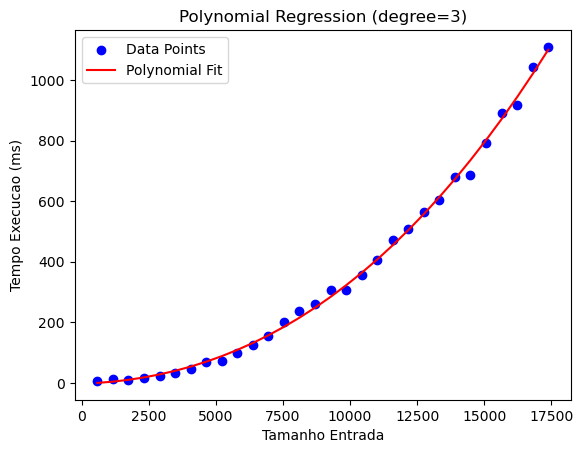

Coefficients: [0.00000000e+00 2.82522578e-03 2.50905130e-06 5.60049285e-11]
Intercept: -2.7478425213376454


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

file_path = 'saida.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path, delimiter=';')

X = df[['TamanhoEntrada']].values
y = df['TempoExecucao(ms)'].values

degree = 3

poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_poly_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_poly_pred, color='red', label='Polynomial Fit')
plt.xlabel('Tamanho Entrada')
plt.ylabel('Tempo Execucao (ms)')
plt.title(f'Polynomial Regression (degree={degree})')
plt.legend()
plt.show()

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
